# Introduction to Signals Processing using Python (Part 1) 

In this short tutorial, we will quickly go through some basic python programming concepts and signal processing constructs needed to get you started with the case studies. This tutorial assumes that you are somewhat familiar with Python.

Every exercise in this week, have to show with Python script in answer as musch as possible.

## Python Lists
In signal processing, we generally have large number of samples of some signals (e.g. audio signal samples) on which we want to apply some signal processing operator (e.g. convolution, Fourier Transform etc). Before we can apply any operator to our signal samples, we must first store it in memory. In Python, the standard way to store large number of samples in a variable is to use a list data-type, i.e. 

In [2]:
signal = [2.0, 3.0, 1.0, 0.0, 2.0, 4.0]

In [3]:
print (signal)

[2.0, 3.0, 1.0, 0.0, 2.0, 4.0]


### Indexing and slicing
Python's **list** data type is versatile. It supports *indexing* to refer to some particular sample in the list. List index runs between $0$ and $N-1$, where $N$ is the length of the list. 
> Caution! This indexing rule is different from Matlab where indexing starts at $1$. 

Lists can be indexed from the end as well. Index $-1$ referes to the last element, index $-2$ second last and so on. 

List *slicing* can be used to extract subparts of a list, and store it in a new list variable. List slicing follow the general syntax *[start: stop: step=1]* to slice out elements from *start* to *stop-1* with a stride length of *step*. You can omit *start* and *stop* values, and  they will default to the beginning and end of the list respectively. Default value for *step* is $1$, and it can also be omitted. 

In [4]:
print (signal[0:3]) # 0th, 1st and 2nd values

[2.0, 3.0, 1.0]


In [5]:
sig2 = signal[:-2:] # from the start uptil -3rd element (i.e. drop last two samples)
print (sig2)

[2.0, 3.0, 1.0, 0.0]


In [6]:
print (signal[::2]) # Every other element starting from the beginning 

[2.0, 1.0, 2.0]


### List comprehensions 
To create specific list sequence and do operations on lists, Python provide intuitive list comprehension statements which are much like the mathematical way of thinking about vectors or collection of samples. This can be best understood with few examples: 

$f[n] = 2n^3 + 3n -4 \quad n \in [0,10]$

In [7]:
lst1 = [2*n**3 + 3*n - 4 for n in range(11)]
print(lst1)

[-4, 1, 18, 59, 136, 261, 446, 703, 1044, 1481, 2026]


So, list comprehensions go between square brackets $[...]$, similar to how we initialize list with specific numbers.  Then we specify the equation we want to evaluate in terms of our sequence variable (iterator) $n$, and finally we specify the range over which $n$ varies.

The **range** is a built-in python function which is used to generate arithmetic sequence and its argument are:
* **range**(*stop*)
* **range**(*start, stop[, step=1]*)

and as you probably might have already guessed that the *range$(N)$* generate sequence $0,1, \ldots N-1$. 

Supposed, we want to apply some function (our favourite is $\sin$) to our list, e.g. 

$$ \begin{equation}
f(n) = sin(2\pi fn) \quad n \in [0,10] 
\end{equation}$$


In [8]:
from math import pi, sin
f = 0.2 # 1/5 Hz
lst2 = [sin(2*pi*f*n) for n in range(10)]
print (lst2)


[0.0, 0.9510565162951535, 0.5877852522924732, -0.587785252292473, -0.9510565162951536, -2.4492935982947064e-16, 0.9510565162951535, 0.5877852522924734, -0.5877852522924728, -0.9510565162951538]


But, Python's lists have some limitations from signal processing perspective.  One prominent limitation is that we cannot directly apply functions like $\sin$ or $\exp$ on all the elements of a list without using a  **for** loop list construct (as shown above) every time. As, we will be working with large number of signal samples all the time, it would be much easier if we could directly use something like $\sin$(lst1) to compute sine of all the elements in the list1.

In the next part of this tutorial, you will learn about an N-dimensional array data-type defined in Python's **NumPy** library (http://www.numpy.org/) which provides the facility to perform operations directly on all the samples in the array, and the library also provides predefined linear algebra constructs like dot products, matrix multiplication and inversion which we will be using quite often. Numpy Ndarrays suit ideally for all our signal processing needs, and as they are similar to the native list data-types, they support same indexing and slicing operations. We will use Nd-arrays from now on to model our signals. 

Python's utility for signal processing and scientific computing is greatly enhanced by open source and freely available libraries like **NumPy**, **SciPy**, **Matplotlib** and **IPython** and we will have an opportunity to use some functionalities from all of these libraries to do our signal processing work. 


### Exercise 1

Show to how to generate values of sin wave 5Hz, ampliture 220 from 0 second to 2 second by using list comprehensions.

In [82]:
from math import pi, sin
f = 5
lst3 = [220*sin(2*pi*f*n) for n in range(0,3)]
print(lst3)

[0.0, -2.6942229581241773e-13, -5.388445916248355e-13]


# Introduction to signal processing using Python (part 2)

In this part, you will learn about numpy ndarrays (1D and 2D), few useful functions that numpy provides for arithmetic operations and linear algebra. In the next part, you will learn how to plot array of values using matplotlib. 

## Numpy arrays 
Numpy's ndarray data type provides the facility to define 1D, 2D or ND arrays easily in Python, and apply linear algebra and signal processing operator on them directly. Before we can use any of numpy facilities, we need to import it. It is a convention that we generally import numpy as np. 

In [14]:
import numpy as np
ar1 = np.array([2,3,5,7,0]) # create list convert to arr
repr(ar1) # represent func look around obj in func and print it

'array([2, 3, 5, 7, 0])'

**array** is the basic function you can use to create numpy arrays, and <b> you can pass it any python list</b> you want to convert to numpy arrays. 

 Numpy's **arange** function can be used to create equally spaced sequence (arithmetic sequences) similar to Python's in-built **range** function. The argument of the function is similar *$arange(start, stop, [step=1.0])$*. This function is really handy to create equally spaced time or frequency axis variables. 
 
- look like range in python but arange have diff value

In [10]:
ar2 = np.arange(0,4,0.2) # equally spaced sequence from 0 (included) to 4 (excluded) with 0.2 as step size
print (ar2)
# stop - step = last element

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8]


Some other useful numpy functions are $np.zeros(shape)$ to create all zeros array, $np.ones(shape)$ to create all ones array, and $np.random.random(shape)$ to create array with entries drawn from a continuous uniform random variable in the range $[0,1)$.

- shape = times of number

In [11]:
ar3 = np.zeros(6)
print (ar3)

[0. 0. 0. 0. 0. 0.]


In [12]:
ar4 = np.ones(10)
print (ar4)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [13]:
ar5 = np.random.random(6)
print (ar5)

[0.80965096 0.39506207 0.98232826 0.42586981 0.7895666  0.93049507]


Some useful numpy array (ndarray) attributes are:
1. ndarray.size: the total number of elements of the array
2. ndarray.dtype: the datatype used to store numerical values 

In [15]:
ar5.size

6

In [16]:
ar5.dtype

dtype('float64')

## Basic numpy operations 
You can use basic arithmetic operators $(+,-,*,/,\%)$ on numpy arrays, and <b> the operator will act naturally on all the elements of the array</b>, e.g.

In [17]:
n = np.arange(11)
fn = 2*n**3 + 3*n - 4
print (fn)

[  -4    1   18   59  136  261  446  703 1044 1481 2026]


Similarly, functions like $\sin, \cos, \log, \exp$ can all be applied directly on the numpy array object, and the function will naturally be applied to each element of the array to compute the output, e.g.

In [46]:
f = 1 #Hz
t = np.arange(0,1,0.01)
x = 5*np.sin(2*np.pi*f*t)
print(x)
print(x.size)

[ 0.00000000e+00  3.13952598e-01  6.26666168e-01  9.36906573e-01
  1.24344944e+00  1.54508497e+00  1.84062276e+00  2.12889646e+00
  2.40876837e+00  2.67913397e+00  2.93892626e+00  3.18711995e+00
  3.42273553e+00  3.64484314e+00  3.85256621e+00  4.04508497e+00
  4.22163963e+00  4.38153340e+00  4.52413526e+00  4.64888243e+00
  4.75528258e+00  4.84291581e+00  4.91143625e+00  4.96057351e+00
  4.99013364e+00  5.00000000e+00  4.99013364e+00  4.96057351e+00
  4.91143625e+00  4.84291581e+00  4.75528258e+00  4.64888243e+00
  4.52413526e+00  4.38153340e+00  4.22163963e+00  4.04508497e+00
  3.85256621e+00  3.64484314e+00  3.42273553e+00  3.18711995e+00
  2.93892626e+00  2.67913397e+00  2.40876837e+00  2.12889646e+00
  1.84062276e+00  1.54508497e+00  1.24344944e+00  9.36906573e-01
  6.26666168e-01  3.13952598e-01  6.12323400e-16 -3.13952598e-01
 -6.26666168e-01 -9.36906573e-01 -1.24344944e+00 -1.54508497e+00
 -1.84062276e+00 -2.12889646e+00 -2.40876837e+00 -2.67913397e+00
 -2.93892626e+00 -3.18711

And, you can directly now plot this sine wave signal using **matplotlib** library. We will discuss the details about plotting in the next part, but just to show how it can easily be done. 

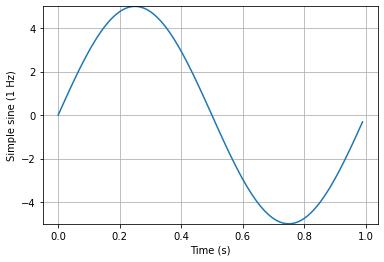

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(t,x)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Simple sine (1 Hz)')
plt.ylim(-5,5)
plt.show()

And, you also have access to simple statistics functions 

In [20]:
np.mean(x) # should be close to 0. 

1.0547118733938987e-17

In [21]:
np.max(x) - np.min(x) # amplitude 

10.0

In [22]:
np.std(x) # root means square value (rms) = sqrt(average x**2)

3.5355339059327378

### Exercise 2
Show to how plot graph of sin wave $5Hz$, ampliture $220\sqrt{2}$ from $0$ second to $2$ second

How many complete cycles in one second?

What is V rms value of the signal?

What is average value of the signal?




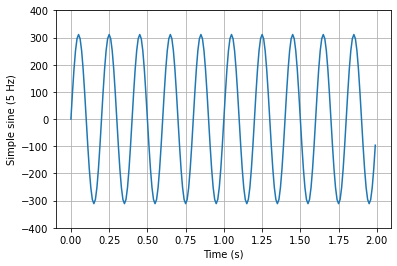

In [72]:
import math

f = 5 #Hz
t = np.arange(0,2,0.01)
x1 = 220*math.sqrt(2)*np.sin(2*np.pi*f*t)
 
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(t,x1)
plt.grid()
plt.xlabel('Time (s)')
plt.ylabel('Simple sine (5 Hz)')
plt.ylim(-400,400)
plt.show()

- 5 cycles in one second

In [73]:
np.mean(x1)

-1.4779288903810084e-14

In [74]:
np.std(x1)

220.0

## 2D numpy array (matrix)
Till now, we have only looked at examples of 1D numpy arrays. But, numpy supports 2D arrays (or matrix) as well. A simple way to initialize a 2D array is to use $np.array$ function and pass it a list of lists, i.e. 

In [23]:
mat1 = np.array([[3,4,1],[3,6,1]])
mat1

array([[3, 4, 1],
       [3, 6, 1]])

In [24]:
mat1.shape # 1st dimension is number of rows, 2nd dimension is number of cols

(2, 3)

In [25]:
mat1.ndim 

2

You can also use other numpy functions like $np.zeros, np.ones$ and pass them the shape of the desired 2D array as a tuple, e.g. 

In [26]:
mat2 = np.ones((4,3))
mat2

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [27]:
mat3 = np.random.random(mat2.shape)
print (mat3)

[[0.71754114 0.70801277 0.58408248]
 [0.36730324 0.77650964 0.82361015]
 [0.29848346 0.91677301 0.14528795]
 [0.6796031  0.03627281 0.00781764]]


Another useful way of creating 2D arrays is to use the $reshape$ attribute to change the shape of an ndarray, e.g.

In [28]:
mat4 = np.arange(10).reshape((2,5)) # number of element must match dimension
mat4

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

But, you have to be careful that the dimension must match, i.e. $10=2\times5$


### Exercise 3
Create $I$, identity matrix diemension (2x2) using np.ones()

Given $$
\begin{bmatrix}
 2 & 3\\
 5 & 1
\end{bmatrix}
$$

Show result in python of $AI$ if A.dot(B) in numpy is $A*B$ matrix multiplication

In [97]:
I = np.eye(2)
A = np.array([[2,3],[5,1]])
print(np.dot(A,I))

[[2. 3.]
 [5. 1.]]


At this point, you are finished Milestone #1 (check out)

## Numpy indexing, slicing, and iterations

Numpy indexing and slicing works similar to indexing and slicing in Python's list. Index in any dimension starts from $0$ and runs till $N-1$ where $N$ is the length of the array in that dimension. For slicing in any dimension, you can use $[start: stop: step=1]$. Thus, for 1D arrays you can simply use

In [29]:
ar1 = np.array([0,2,5,1,6,3])
ar1[-1] # Last element 

3

In [30]:
ar1[0:5:2] # 0th, 2nd, 4th element. 

array([0, 5, 6])

For N dimensional array, you need to specify the index or slicing for each dimension separated by commas. E.g. for 2D arrays, specify first the $0th$ dimension (row) index, then $1st$ dimension (column) index, i.e. 

In [31]:
ar2 = np.arange(15).reshape(3,5)
ar2[2,4]

14

In [32]:
ar2[:2,1:4] # 0th, 2nd rsectionow, 1st, 2nd, 3rd column

array([[1, 2, 3],
       [6, 7, 8]])

You can easily iterate over 2D arrays by thinking of them as list of lists, e.g.

In [33]:
for row in ar2: # 2D arrays are lists of lists (rows)
    print (row)

[0 1 2 3 4]
[5 6 7 8 9]
[10 11 12 13 14]


and if you want to iterate over each element of a 2D matrix, you can use 

In [34]:
for num in ar2.flat: # it flattens the 2D matrix to a 1D array 
    print (num,)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14


> Caution! numpy makes a distinction between 1D arrays and 2D arrays, and so $np.zeros(3)$ is not same as $np.zeros((3,1))$, even when they appear same. To be precise numpy treats $np.zeros((3,1))$ as a column matrix. But, $np.zeros(3)$ is niether a column or a row matrix, it is just a 1D array, and so many matrix operations are not well defined for 1D numpy array.

> We can convert any 1D numpy array to 2D row or column matrix easily as show below. This will be important for applying linear algebra routines correctly. 

In [35]:
a = np.empty(5) # 1D array 
a_col_mat = a[:,np.newaxis] # Convert 1D array to 2D column matrix 
a_row_mat = a[np.newaxis,:] # Convert 1D array to 2D row matrix 
print (a_col_mat)
print (a_row_mat)

[[-4.]
 [-2.]
 [ 0.]
 [ 2.]
 [ 4.]]
[[-4. -2.  0.  2.  4.]]


### Exercis 4
What is np.empty() do?

Can we reshape a to 2x2 matrix? Why?

- Return a new array of given shape and type, without initializing entries.
<br><br>
- yes, elements in the matrix are the same including matching dimension

## Linear algebra operations 
Basic linear algebra operations are needed to effectively apply signal processing algorithms. Numpy provides support for key linear algebra functions. 

1. Dot product, matrix multiplication: $np.dot$ [Read Docs](http://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html#numpy.dot)
2. Determinant: $np.linalg.det$ [Read Docs](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.det.html#numpy.linalg.det)
3. Vector norm: $np.linalg.norm$ [Read Docs](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html#numpy.linalg.norm)
4. Trace: $np.trace$ [Read docs](http://docs.scipy.org/doc/numpy/reference/generated/numpy.trace.html#numpy.trace)
5. Matrix inverse: $np.linalg.inv$ [Read Docs](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.inv.html#numpy.linalg.inv) 
> Tip: You can type any Python / numpy function followed by a question mark (?) and press Enter to see the docs directly in the IPython terminal. 

In [81]:
Python /np.ones?

In [ ]:
Python /np.ones

In [37]:
Python /np.ones

NameError: name 'Python' is not defined

## Representing Systems of Linear Equations using Matrices
A system of linear equations can be represented in matrix form using a coefficient matrix. 
Consider the system:
$$
\begin{align*}
    2x_1+ 3x_2 &= 8 \\
    5x_1-x_2 &= -2
\end{align*} 
$$
The coefficient matrix can be formed by aligning the coefficients of the variables of each equation in a row. Make sure that each equation is written in standard form with the constant term on right.

Then, the coefficient matrix($\textbf{A}$) for the above system is
$$
\begin{bmatrix}
 2 & 3\\
 5 & 1
\end{bmatrix}
$$

The variables we have are $x_1$ and $x_2$ . So we can write the variable vector($\textbf{x}$) as
$
\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix}
$

On the right side of the equality we have the constant terms of the equations, 8 and −2.
 Vector($\textbf{b}$) take the places at the first and the second rows in the constant matrix. 
 So, the vector($\textbf{b}$) becomes
$
\begin{bmatrix}
8 \\ 2
\end{bmatrix}
$

Now, the system can be represented as $\textbf{Ax=b}$ as 
$$
\begin{bmatrix}
 2 & 3\\
 5 & 1
\end{bmatrix}
\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix}=
\begin{bmatrix}
8 \\  2
\end{bmatrix}
$$

In [38]:
import numpy as np
A = np.array([[2,3],  
            [5, 1]])
b = np.array([[8,2]]).T

### Exercise 5
Explain the object of <b>np.array().T </b>

    
Show result of $(A^{-1})^T$ and $ (A^T)^{-1}$ for

$$ 
A=
\begin{bmatrix}
 2 & 3\\
 5 & 1
\end{bmatrix}
$$

In [90]:
Ainv = np.linalg.inv(A)
AinvT = np.array(Ainv).T
print(AinvT)

AT = np.array(A).T
ATinv = np.linalg.inv(AT)
print(ATinv)

[[-0.07692308  0.38461538]
 [ 0.23076923 -0.15384615]]
[[-0.07692308  0.38461538]
 [ 0.23076923 -0.15384615]]


In [39]:
print(A), print(b)

[[2 3]
 [5 1]]
[[8]
 [2]]


(None, None)

In [40]:
print('Determinant of A is none zero', np.linalg.det(A))

Determinant of A is none zero -13.0


### Exercise 6
Why we need to check determinant of matrix<b> A </b> ?

Why we need to find out $A^{-1}$?

- It useful for linear equations, capturing how linear transformation change area or volume, and changing variables in integrals. Including, scalar result.
<br><br>
- Matrix cannot divide, then we can multiply by an inverse instead.

In [92]:
A_inv = np.linalg.inv(A)

In [93]:
x = A_inv.dot(b) # A inverse * b

Ax = b
A.inv * Ax = A.inv * b
(A.inv * A) x = A.inv * b
I * x = A.inv * b
x = A.inv * b

### Exercise 7
Supposed A, B are matrixes, A.dot(B) in python is $A*B$ in mathermatics.

What is the result of $Ax$?


Are they equal $b$?

In [96]:
print (np.dot(A,x))

[[8.]
 [2.]]


- yes

### At this point, you are finished Milestone #2 (check out)

#### Matrix A translated input vector x to output vector b

We can use plt.quiver()  to draw vectors. Given $ Ax = b$ that means matrix A translates vector x to vector b.

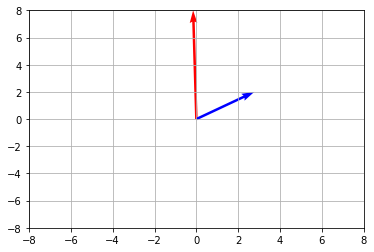

In [43]:
plt.quiver([0, 0], [0, 0], x, b, angles='xy',scale_units='xy', scale=1,color=['r','b'])
plt.xlim(-8,8)
plt.ylim(-8,8)
plt.grid(b=True, which='major') #<-- plot grid lines

#### Exercise 8
Show the matrix ($Z$) that can  translate vector $b$ to vector $x$

Proof  $Z*b =x$ using Python numpy

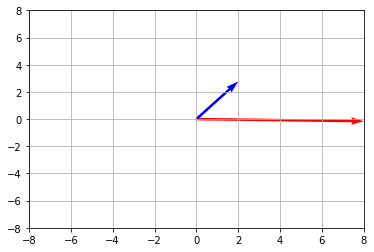

In [98]:
plt.quiver([0, 0], [0, 0], b, x, angles='xy',scale_units='xy', scale=1,color=['r','b'])
plt.xlim(-8,8)
plt.ylim(-8,8)
plt.grid(b=True, which='major')

### Matrix Eigenvalues and Eigenvectors


What is the vector when translated by matrix A, it is scale multication of the vector.
For any given matrix A, are there any vector u when multiply by A will got the same vector but scaled.

A eigenvalue $\lambda$ and eigenvector $\textbf{u}$ satifie
$$ Au = \lambda u $$
where $\textbf{A}$ is square matrix and <b>$\lambda$</b> is constant number.

Or multiplying <b>$u$</b> by <b>$A$</b> likes scaling <b>$u$</b> by <b>$\lambda$</b>

## Basic Operation on Eigenvalues and Eigenvectors

$$
A =
\begin{bmatrix}
 2 & 3\\
 5 & 1
\end{bmatrix}
$$




In [44]:
eigvals, eigvecs = np.linalg.eig(A)
Au = A.dot(eigvecs[:,0])
lambda_b = eigvals[0]*eigvecs[:,0]

There are more than one eigen values and eigen vectors of matrix A.

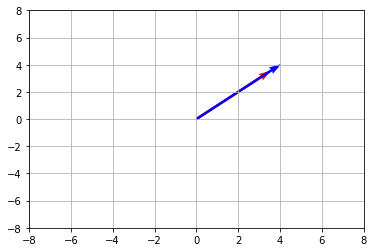

In [45]:
plt.quiver([0, 0], [0, 0], Au, lambda_b, angles='xy',scale_units='xy', scale=1,color=['r','b'])
plt.xlim(-8,8)
plt.ylim(-8,8)
plt.grid(b=True, which='major') #<-- plot grid lines

### Exercise 9
Show other eigen value and eigen vector of matrix A 
$$
A =
\begin{bmatrix}
 2 & 3\\
 5 & 1
\end{bmatrix}
$$




Plot those vector, $A*u$ and $\lambda * u$ using plt.quiver()

Reference Source:

    https://github.com/mayankgrd/signal-processing-python-tutorial

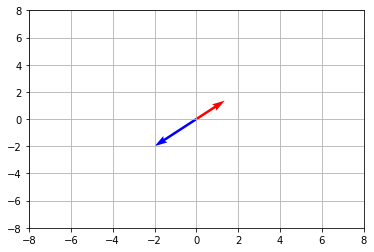

In [100]:
eigvals, eigvecs = np.linalg.eig(A)
Au = A.dot(eigvecs[:,1])
lambda_b = eigvals[1]*eigvecs[:,1]

plt.quiver([0, 0], [0, 0], Au, lambda_b, angles='xy',scale_units='xy', scale=1,color=['r','b'])
plt.xlim(-8,8)
plt.ylim(-8,8)
plt.grid(b=True, which='major')